In [1]:
import csv
import sys
maxInt = sys.maxsize

while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

import numpy as np 
import pandas as pd 
import glob
import json
import regex as re
import gensim
import gensim.downloader as api
from gensim.models.doc2vec import TaggedDocument, Doc2Vec 
from gensim.test.utils import get_tmpfile

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import utils, tree
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import random

from tqdm import tqdm
import multiprocessing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout

from collections import defaultdict

import matplotlib.pyplot as plt

import heapq

import pickle
import joblib

import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("/Users/USER/Desktop/project/cleaned_data.csv")

In [7]:
employee = df['employee']
def dupli(x):
    return list(dict.fromkeys(x))
employee = dupli(employee)

In [8]:
employee_index = {}
index_count = 1
for i in employee:
    employee_index[i] = index_count
    index_count += 1

In [9]:
employee_index

{'allen-p': 1,
 'arnold-j': 2,
 'bass-e': 3,
 'baughman-d': 4,
 'beck-s': 5,
 'blair-l': 6,
 'brawner-s': 7,
 'buy-r': 8,
 'campbell-l': 9,
 'carson-m': 10,
 'cash-m': 11,
 'corman-s': 12,
 'cuilla-m': 13,
 'dasovich-j': 14,
 'davis-d': 15,
 'dean-c': 16,
 'delainey-d': 17,
 'derrick-j': 18,
 'donoho-l': 19,
 'donohoe-t': 20,
 'dorland-c': 21,
 'ermis-f': 22,
 'farmer-d': 23,
 'fischer-m': 24,
 'fossum-d': 25,
 'gay-r': 26,
 'geaccone-t': 27,
 'germany-c': 28,
 'giron-d': 29,
 'griffith-j': 30,
 'grigsby-m': 31,
 'guzman-m': 32,
 'haedicke-m': 33,
 'hain-m': 34,
 'hayslett-r': 35,
 'heard-m': 36,
 'hernandez-j': 37,
 'hodge-j': 38,
 'horton-s': 39,
 'hyatt-k': 40,
 'hyvl-d': 41,
 'jones-t': 42,
 'kaminski-v': 43,
 'kean-s': 44,
 'keavey-p': 45,
 'keiser-k': 46,
 'kitchen-l': 47,
 'kuykendall-t': 48,
 'lavorato-j': 49,
 'lay-k': 50,
 'lenhart-m': 51,
 'lewis-a': 52,
 'linder-e': 53,
 'lokay-m': 54,
 'lokey-t': 55,
 'love-p': 56,
 'maggi-m': 57,
 'mann-k': 58,
 'martin-t': 59,
 'may-l': 

In [3]:
# Convert the DataFrame to a dictionary
data = defaultdict(list)
for index, row in df.iterrows():
    label = row[3]
    text = row[2]
    data[label].append(text)

# Shuffle the data
for label in data:
    random.shuffle(data[label])

# Split the data into training and testing sets
train_data = {}
test_data = {}
for label in data:
    train_data[label], test_data[label] = train_test_split(data[label], test_size=0.2)

# Tokenize the data
for label in train_data:
    train_data[label] = [word_tokenize(text) for text in train_data[label]]
for label in test_data:
    test_data[label] = [word_tokenize(text) for text in test_data[label]]

# Store the data in a dictionary
data_dict = {}
for label in train_data:
    data_dict[label] = (train_data[label], test_data[label])

In [10]:
label = "donoho-l"
train_data = data_dict[label][0]
text = train_data[50]

In [11]:
text

['--',
 'Lindy',
 ':',
 'Below',
 'are',
 'our',
 'flight',
 'arrangements',
 'Omaha/Houston',
 'roundtrip',
 '.',
 'The',
 'rental',
 'car',
 'information',
 'is',
 'not',
 'included',
 '(',
 'did',
 "n't",
 'think',
 'you',
 'would',
 'need',
 ')',
 '.',
 'We',
 'are',
 'really',
 'looking',
 'forward',
 'to',
 'our',
 'visit',
 'and',
 'especially',
 'to',
 'see',
 'Sam',
 '!',
 '!',
 'See',
 'you',
 'on',
 'Thursday',
 '.',
 'Love',
 '.',
 'Flo',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 '*',
 '*',
 '*',
 'FLIGHT',
 'ITINERARY',
 '*',
 '*',
 '*',
 'Flight',
 'Itinerary',
 ':',
 'Round',
 'Trip',
 ',',
 'Omaha',
 ',',
 'NE',
 'to',
 'Houston',
 ',',
 'TX',
 'Hotwire',
 'Itinerary',
 'Number',
 ':',
 'PKR5VX6A7W',
 'If',
 'you',
 'need',
 'to',
 'contact',
 'Hotwi

In [4]:
# Define the size of the vector representation of each document
vector_size = 100

# Define the parameters for training the Doc2Vec model
max_epochs = 40
alpha = 0.025
min_alpha = 0.00025
num_cores = 8  

# Create an empty Doc2Vec model
model = Doc2Vec(vector_size=vector_size, min_count=2, epochs=max_epochs, workers=num_cores)

# Define a function to convert text into TaggedDocuments
def tag_docs(data, label):
    tagged_docs = []
    for i, text in enumerate(data):
        doc = TaggedDocument(words=text, tags=[label + '_%s' % i])
        tagged_docs.append(doc)
    return tagged_docs

# Create TaggedDocuments for the training data
train_tagged = []
for label in train_data:
    train_tagged += tag_docs(train_data[label], label)

# Build the vocabulary
model.build_vocab(train_tagged)

# Train the model
model.train(train_tagged, total_examples=model.corpus_count, epochs=model.epochs)

# Create TaggedDocuments for the testing data
test_tagged = {}
for label in test_data:
    test_tagged[label] = tag_docs(test_data[label], label)

# Get the document vectors for the training and testing data
train_vecs = {}
for label in train_data:
    train_vecs[label] = [model.dv[label + '_%s' % i] for i in range(len(train_data[label]))]
test_vecs = {}
for label in test_data:
    test_vecs[label] = [model.infer_vector(doc.words) for doc in test_tagged[label]]

# Store the data in a dictionary
data_dict = {}
for label in train_data:
    data_dict[label] = (train_vecs[label], test_vecs[label])

In [5]:
# Save the trained model to a file
model.save("doc2vec_svm.bin")

In [5]:
# Define a function to train a one-class SVM model for a given label
def train_one_class_svm(train_vecs, train_data, label):
    positive_class = label  # choose one class as the positive class
    X_pos = train_vecs[positive_class]
    X_neg = np.concatenate([train_vecs[l] for l in train_data if l != positive_class])
    np.random.shuffle(X_neg)  # shuffle the negative training set
    X_neg_sample = X_neg[:10000]  # randomly sample 50,000 negative training samples
    model = OneClassSVM(kernel='linear')
    model.fit(X_pos)
    return model, X_neg_sample

# Train one-class SVM models for all labels
models = {}
for label in train_data:
    model, X_neg_sample = train_one_class_svm(train_vecs, train_data, label)
    models[label] = (model, X_neg_sample)

# Test the models on the testing data
predictions = []
true_labels = []
for label in test_data:
    model, X_neg_sample = models[label]
    y_pred_pos = model.predict(test_vecs[label])
    y_pred_neg = model.predict(X_neg_sample)
    y_pred = np.concatenate([y_pred_pos, y_pred_neg])
    predictions += list(y_pred)
    true_labels += [1] * len(y_pred_pos) + [-1] * len(y_pred_neg)

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

# Save all the trained models
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

Accuracy: 0.5440904907469932


In [ ]:
# Save all the trained models
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

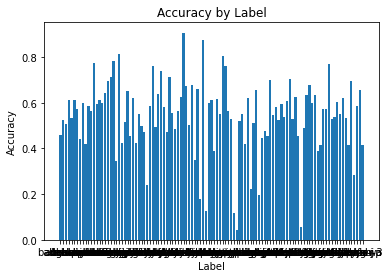

In [8]:
# Calculate the accuracy for each label
label_accuracy = {}
for label in test_data:
    model, X_neg_sample = models[label]
    y_pred_pos = model.predict(test_vecs[label])
    y_pred_neg = model.predict(X_neg_sample)
    y_pred = np.concatenate([y_pred_pos, y_pred_neg])
    true_labels = [1] * len(y_pred_pos) + [-1] * len(y_pred_neg)
    label_accuracy[label] = accuracy_score(true_labels, y_pred)

# Create a bar plot of the accuracy scores
plt.bar(label_accuracy.keys(), label_accuracy.values())
plt.title('Accuracy by Label')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Test the models on the testing data
y_pred = []
y_true = []
for label in test_data:
    model, X_neg_sample = models[label]
    y_pred_pos = model.predict(test_vecs[label])
    y_pred_neg = model.predict(X_neg_sample)
    y_pred.extend(list(y_pred_pos) + list(y_pred_neg))
    y_true.extend([1] * len(y_pred_pos) + [-1] * len(y_pred_neg))

# Calculate the evaluation metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, pos_label=-1, average='binary')
confusion = confusion_matrix(y_true, y_pred)

# Print the evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion matrix:')
print(confusion)

Precision: 0.9269631116329496
Recall: 0.5482935779816513
F1-score: 0.6890298138787097
Confusion matrix:
[[597640 492360]
 [ 47089  46148]]
